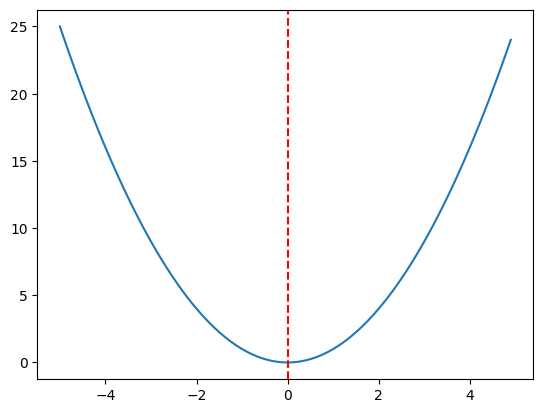

In [3]:
# convex unimodal optimization function
from numpy import arange
from matplotlib import pyplot

#objective function
def objective(x):
    return x[0]**2.0

#define range for input
r_min, r_max = -5.0, 5.0
# sample input range uniformly at 0.1 increments
inputs = arange(r_min, r_max, 0.1)
# sample input range uniformly at 0.1 increments
results = [objective([x]) for x in inputs]
# create a line plot of input vs result
pyplot.plot(inputs, results)
# define optimal input value
x_optima = 0.0
# draw a vertical line at the optimal input
pyplot.axvline(x=x_optima, ls='--', color='red')
# show the plot
pyplot.show()

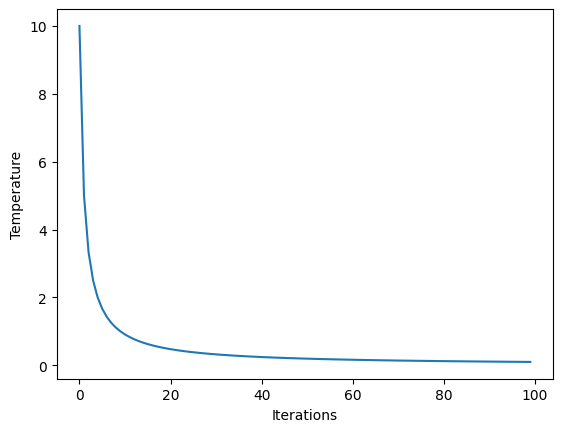

In [6]:
iterations = 100
initial_temp = 10
iterations = [i for i in range(iterations)]
temperatures = [initial_temp/float(i+1) for i in iterations]
pyplot.plot(iterations, temperatures)
pyplot.xlabel("Iterations")
pyplot.ylabel("Temperature")
pyplot.show()

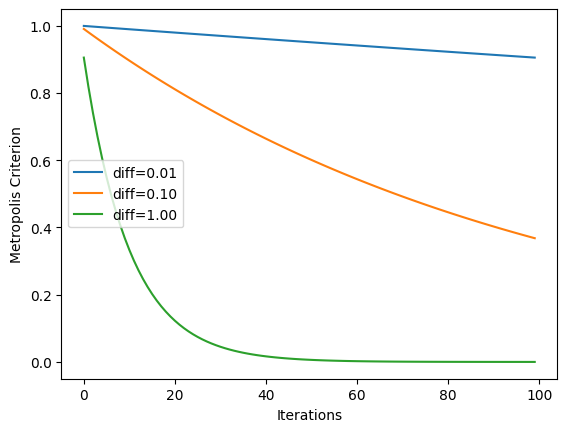

In [12]:
from math import exp

iterations = 100
initial_temp = 10
iterations = [i for i in range(iterations)]
temperatures = [initial_temp/float(i+1) for i in iterations]
differences = [0.01, 0.1, 1.0]

for d in differences:
    metropolis = [exp(-d/t) for t in temperatures]
    label = 'diff=%.2f' %d
    pyplot.plot(iterations, metropolis, label = label)


pyplot.xlabel("Iterations")
pyplot.ylabel("Metropolis Criterion")
pyplot.legend()
pyplot.show()

In [6]:
from numpy import asarray
from numpy import exp
from numpy.random import randn
from numpy.random import rand
from numpy.random import seed
 
# objective function
def objective(x):
	return x[0]**2.0

#simulated annealing algorthm
def simulated_annealing(objective, bounds, n_iterations ,step_size, temp):
    best = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
    best_eval = objective(best)
    curr, curr_eval = best, best_eval

    for i in range(n_iterations):
        candidate = curr + randn(len(bounds)) * step_size
        candidate_eval = objective(candidate)

        if candidate_eval < best_eval:
            best, best_eval = candidate, candidate_eval
            print(">%d f(%s) = %.5f" % (i,best, best_eval)) 
        
        diff = candidate_eval -  curr_eval
        t =  temp/float(i+1)
        metropolis = exp(-diff/t)

        if diff < 0 or rand() < metropolis:
            curr, curr_eval = candidate, candidate_eval
    return [best, best_eval]


# seed the pseudorandom number generator
seed(1)
# define range for input
bounds = asarray([[-5.0, 5.0]])
# define the total iterations
n_iterations = 100000
# define the maximum step size
step_size = 0.1
# initial temperature
temp = 10
# perform the simulated annealing search
best, score = simulated_annealing(objective, bounds, n_iterations, step_size, temp)
print('Done!')
print('f(%s) = %f' % (best, score))

>34 f([-0.78753544]) = 0.62021
>35 f([-0.76914239]) = 0.59158
>37 f([-0.68574854]) = 0.47025
>39 f([-0.64797564]) = 0.41987
>40 f([-0.58914623]) = 0.34709
>41 f([-0.55446029]) = 0.30743
>42 f([-0.41775702]) = 0.17452
>43 f([-0.35038542]) = 0.12277
>50 f([-0.15799045]) = 0.02496
>66 f([-0.11089772]) = 0.01230
>67 f([-0.09238208]) = 0.00853
>72 f([-0.09145261]) = 0.00836
>75 f([-0.05129162]) = 0.00263
>93 f([-0.02854417]) = 0.00081
>144 f([0.00864136]) = 0.00007
>149 f([0.00753953]) = 0.00006
>167 f([-0.00640394]) = 0.00004
>225 f([-0.00044965]) = 0.00000
>503 f([-0.00036261]) = 0.00000
>512 f([0.00013605]) = 0.00000
>1861 f([7.80537166e-05]) = 0.00000
>2492 f([-1.56690746e-05]) = 0.00000
>2625 f([-3.01282671e-06]) = 0.00000
>15360 f([-2.06348468e-06]) = 0.00000
>80658 f([-1.84710259e-06]) = 0.00000
Done!
f([-1.84710259e-06]) = 0.000000


>5 f([-0.71624542]) = 0.51301
>7 f([-0.65250924]) = 0.42577
>9 f([-0.47524847]) = 0.22586
>11 f([-0.45712705]) = 0.20897
>12 f([-0.40069256]) = 0.16055
>14 f([-0.327695]) = 0.10738
>15 f([-0.29039562]) = 0.08433
>16 f([-0.23701453]) = 0.05618
>18 f([-0.04563249]) = 0.00208
>19 f([-0.01255278]) = 0.00016
>25 f([0.00329871]) = 0.00001
>32 f([-0.00295045]) = 0.00001
>47 f([-0.00066185]) = 0.00000
>79 f([0.00065104]) = 0.00000
>251 f([0.00032916]) = 0.00000
>440 f([-0.00030124]) = 0.00000
Done!
f([-0.00030124]) = 0.000000


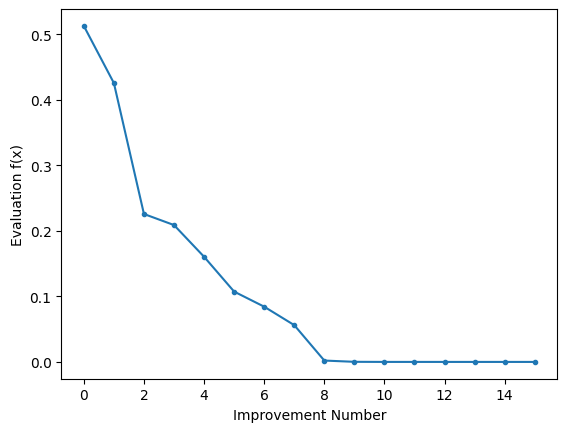

In [72]:
from numpy import asarray
from numpy import exp
from numpy.random import randn
from numpy.random import rand
from numpy.random import seed
 
# objective function
def objective(x):
	return x[0]**2.0

#simulated annealing algorthm
def simulated_annealing(objective, bounds, n_iterations ,step_size, temp):
    best = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
    best_eval = objective(best)
    curr, curr_eval = best, best_eval
    scores = list()
    
    for i in range(n_iterations):
        candidate = curr + randn(len(bounds)) * step_size
        candidate_eval = objective(candidate)

        if candidate_eval < best_eval:
            best, best_eval = candidate, candidate_eval
            print(">%d f(%s) = %.5f" % (i,best, best_eval)) 
            scores.append(best_eval)
        
        diff = candidate_eval -  curr_eval
        t =  temp/float(i+1)
        metropolis = exp(-diff/t)

        if diff < 0 or rand() < metropolis:
            curr, curr_eval = candidate, candidate_eval
    return [best, best_eval, scores]


# seed the pseudorandom number generator
seed(1)
# define range for input
bounds = asarray([[-5.0, 5.0]])
# define the total iterations
n_iterations = 1000
# define the maximum step size
step_size = 0.1
# initial temperature
temp = 10
# perform the simulated annealing search
best, score, scores = simulated_annealing(objective, bounds, n_iterations, step_size, temp)
print('Done!')
print('f(%s) = %f' % (best, score))

# line plot of best scores
pyplot.plot(scores, '.-')
pyplot.xlabel('Improvement Number')
pyplot.ylabel('Evaluation f(x)')
pyplot.show()

rand 0.9758699375629136
{1} 0.9048374180359595
rand 0.7679869794828058
{2} 0.8187307530779818
rand 0.6650987783358207
{3} 0.7408182206817179
rand 0.10954171721626849
{4} 0.6703200460356393
rand 0.5858283844279211
{7} 0.4965853037914095
rand 0.1763380407698657
{8} 0.44932896411722156
rand 0.016624106532905913
{10} 0.36787944117144233
rand 0.06336051137403531
{51} 0.006096746565515638
